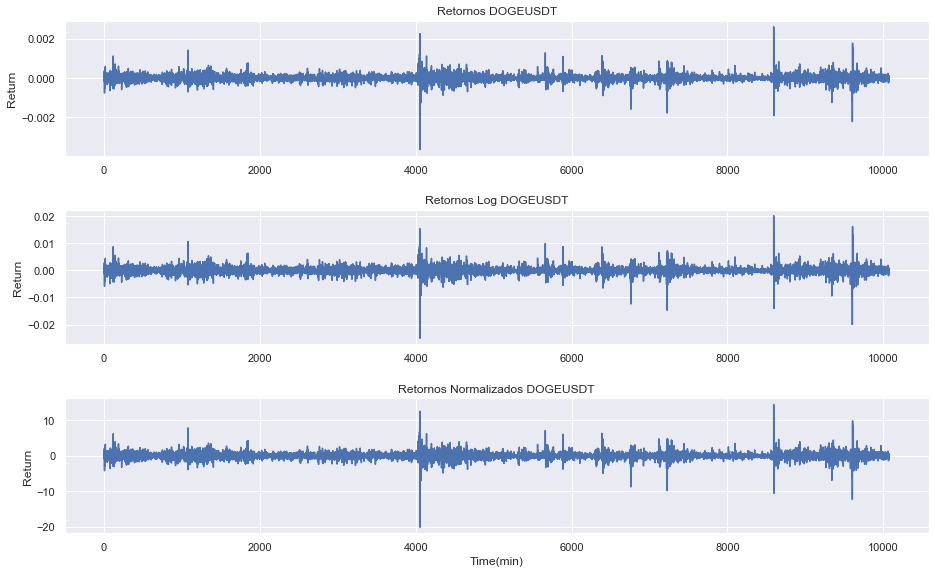

In [3]:
#Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import itertools
import math

#Análise dos dados
df = pd.read_csv('dogeusdt.csv')
Price = df["close"]
Time = list(range(len(Price)-1))
df

r=[]
rl=[]
rn=[]
R = []
RL = []
RN = []


# Retorno
for i in range(len(Price)-1):
    r = Price[i+1] - Price[i]
    R.append(r)

m = np.mean(R)
s = np.std(R)

# Retorno Log
for i in range(len(Price)-1):
    rl = np.log10(Price[i+1]) - np.log10(Price[i])
    RL.append(rl)

# Retorno Normalizado
for x in R:
    rn = (x-m)/s
    RN.append(rn)


sns.set()

def plot_Returns(df):
    fig, axs = plt.subplots(3, figsize=(15,8))
    plt.subplots_adjust(left=0.1, 
                    bottom=0.01,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
    plt.xlabel('Time(min)')
    plt.ylabel('Return') 
    axs[0].plot(Time,R, "-")
    axs[0].set_title('Retornos DOGEUSDT')
    axs[0].set_ylabel('Return') 
    
    axs[1].plot(Time,RL, "-")
    axs[1].set_title('Retornos Log DOGEUSDT')
    axs[1].set_ylabel('Return')
    
    axs[2].plot(Time,RN, "-")
    axs[2].set_title('Retornos Normalizados DOGEUSDT')
    axs[2].set_ylabel('Return')
    #plt.savefig("Returns")
plot_Returns(df)



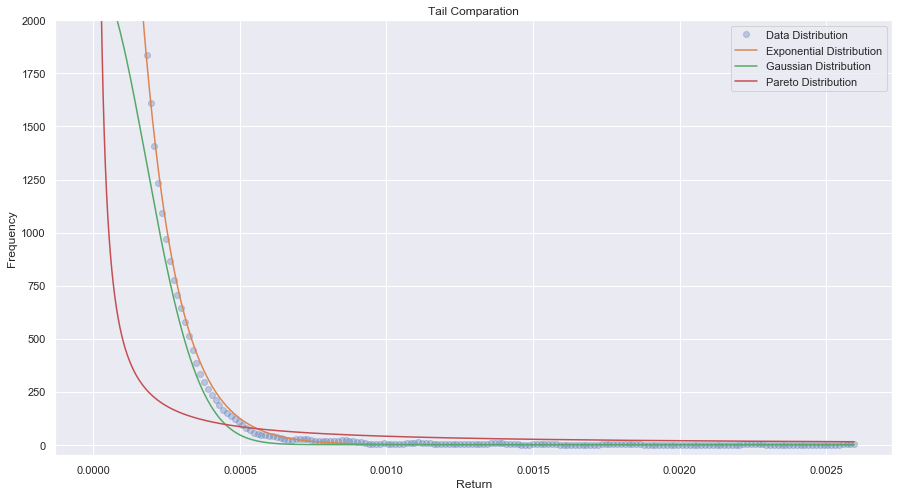

In [4]:
#Análise da Cauda Positiva
R_pos = []
R_Pos = []
for x in R:
    if x>=0:
        R_pos.append(x)
R_Pos=np.sort(R_pos)



G=[]
#Distribuição Gaussiana
for x in R_Pos:
    ge = (1/np.sqrt(2*np.pi*s**2)) * np.exp(-(x-m)**2/(2*s**2))
    G.append(ge)
    
E =[]
#Distribuição Exponencial
Lambda = 1/(np.mean(R_Pos))
for x in R_Pos:
    e = Lambda*(np.exp(-Lambda*x))
    E.append(e)
    

#Distribuição    
def kde(x,data,b):
    N=len(data)
    r=0
    for i in range(len(data)):
        f = ((x-data[i])/b)
        r += (1/math.sqrt(2*math.pi))*math.exp(-0.5*(f**2))
    r /= (N*b)
    return(r)

B = 1.05*np.std(R_Pos)*(len(R_Pos)**(-1/5))
X = np.linspace(min(R_Pos),max(R_Pos),200)    
Y=[]
for i in range(X.shape[0]):
    Y.append(kde(X[i],R_Pos,B))

#Pareto    
Rs = sorted(R)
R_POS = []
for i in range(len(Rs)):
    if Rs[i]>0:
        rs = Rs[i]
        R_POS.append(rs)
        
for x in R_POS:
    a = np.mean(np.log(x/min(R_POS)))
    
alfa = 1/a

def pareto(alpha, x, xo):
    f = ((alpha)*(xo**(alpha))) /(x**(1+alpha))
    return (f)

Pareto = pareto(alfa,R_POS,min(R_POS))

fig, ax = plt.subplots(figsize=(15,8))
plt.title("Tail Comparation")
plt.xlabel('Return')
plt.ylabel('Frequency') 
plt.ylim([-50, 2000])
#ax.set_yscale('log')
ax.plot(X,Y,"o",alpha = 0.3, label = "Data Distribution")
ax.plot(R_Pos,E, "-", label = "Exponential Distribution")
ax.plot(R_Pos,G, "-", label = "Gaussian Distribution")
ax.plot(R_POS,Pareto,"-", label = "Pareto Distribution")
plt.legend()
#plt.savefig("Ttail")

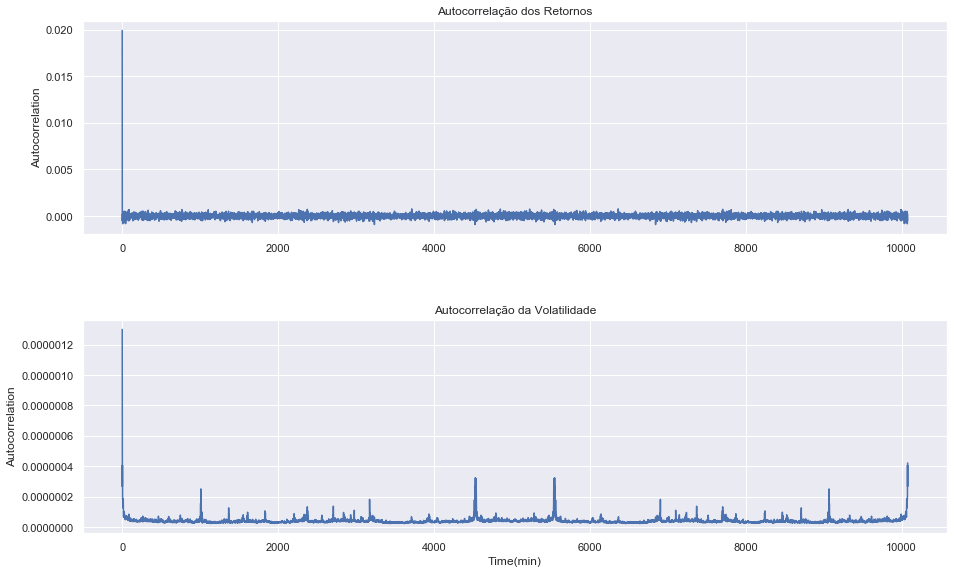

In [5]:
# Autocorreação dos Retornos#
Fourier_TR = np.fft.fft(RL)
Spectral_Density_R = Fourier_TR*np.conj(Fourier_TR)
FR = np.fft.ifft(Spectral_Density_R)
Autocor_Ret = FR.real

# Autocorreação das Volatilidades#
RL2 = []
for rl in RL:
    Rl = rl**2
    RL2.append(Rl)
Fourier_TV = np.fft.fft(RL2)
Spectral_Density_V = Fourier_TV*np.conj(Fourier_TV)
FV = np.fft.ifft(Spectral_Density_V)
Autocor_Vol = FV.real


# Plot das Autocorrelações #
def plot_Autocor(df):
    fig, axs = plt.subplots(2, figsize=(15,8))
    plt.subplots_adjust(left=0.1, 
                    bottom=0.01,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
    plt.xlabel('Time(min)')
    plt.ylabel('Autocorrelation') 
    axs[0].plot(range(len(Autocor_Ret)),Autocor_Ret, "-")
    axs[0].set_title('Autocorrelação dos Retornos')
    axs[0].set_ylabel('Autocorrelation') 
    
    axs[1].plot(range(len(Autocor_Vol)),Autocor_Vol, "-")
    axs[1].set_title('Autocorrelação da Volatilidade')
    axs[1].set_ylabel('Autocorrelation')
    #plt.savefig("AutoCor")
plot_Autocor(df)